In [1]:
# Import packages 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import Bio # Biopython packages 

# Import other packages
from Bio.Data import CodonTable # Codon Table 
from colorama import Back, Style, Fore # Color and style package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter



In [2]:

# Working with the TP53 gene. 

from Bio import SeqIO
count = 0 
sequences = [] 

# Here we are setting up an array to save our sequences for the next step

for seq_record in SeqIO.parse("/Users/kim/Desktop/repos/-Basic-Bioinformatics-Projects/DNA to Protein_Biopython/TP53seq.fna", "fasta"):
    if (count < 2):
        sequences.append(seq_record)
        print("Id: " + seq_record.id  + " \t " + "Length: " + str("{:,d}".format(len(seq_record))) )
        print(repr(seq_record.seq) + "\n")
        count = count + 1

# Double check our code
print(sequences[0].id)

# We see in our output that the two sequences are not entirely the same as the length differ by ~20 bases. 


Id: NC_000017.11:c7687490-7668421 	 Length: 19,070
Seq('CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGA...CCA')

Id: NC_060941.1:c7591594-7572544 	 Length: 19,051
Seq('CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGA...CCA')

NC_000017.11:c7687490-7668421


In [3]:
# Assign each sequences to a variable for easy access
seq1 = sequences[0].seq
seq2 = sequences[1].seq

### Only working with the first sequence

In [4]:
# Sequences act like strings - I want to characterize our two sequences.

# length of nucleotides - try chr1
print(len(seq1))

# Access elements of the sequences 
print("First base of the sequence - " + seq1[0])
print("Last base of the sequence - " + seq1[-1])

# The Seq object has a .count() method, just like a string. 
# Note that this means that like a Python string, this gives a non-overlapping count:
print("AAAA".count("AA"))

# Another way of finding the number of each nucleotides in each sequence
def nucleotides_composition(seq):
    nucleotides = {'A': 0,
                   'G': 0,
                   'C': 0,
                   'T': 0}
    for bases in nucleotides: 
        nucleotides[bases] = seq.count(bases)
    return nucleotides
seq1_nuc = nucleotides_composition(seq1)

print(seq1_nuc)


19070
First base of the sequence - C
Last base of the sequence - A
2
{'A': 4966, 'G': 4778, 'C': 4638, 'T': 4688}


In [5]:
# Create a visualization to show the composition of the nucleotides in the TP53 sequence

# First, turn the dictionary of the nucleotide compositions into a dataframe using pandas
seq1_df = pd.DataFrame.from_dict(seq1_nuc, orient = 'index')
seq1_df = seq1_df.reset_index()
seq1_df = seq1_df.rename(columns={"index": "Nucleotide", 0: "Composition"})
seq1_df

# Then, use seaborn as data visualization tool to create a graph to visualize the composition
#nuc_bar = sns.barplot(x = ndf['Nucleotide'], y = ndf['Composition'])

,Nucleotide,Composition
0,A,4966
1,G,4778
2,C,4638
3,T,4688


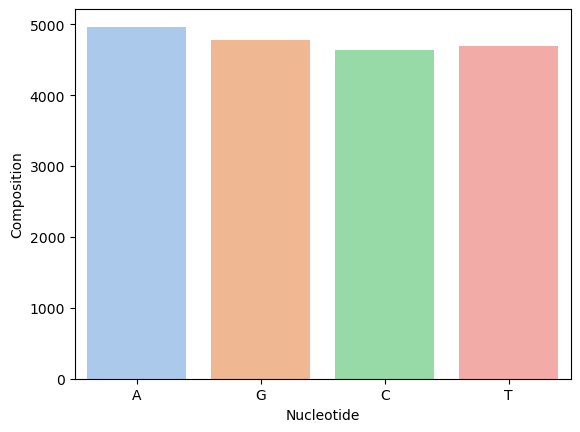

In [6]:

sns.barplot(x='Nucleotide', 
            y='Composition', 
            data=seq1_df, 
            palette = 'pastel')

# Show the plot
plt.show()

In [7]:
# Calculate GC content 
    # There are three ways to calculate this: One using the Biopython package, one using calculation, and the other one will use a for loop

#Biopython package
from Bio.SeqUtils import GC
GC_biopython = print("GC content - Biopython: " + str(GC(seq1)))


#Calculations
GC_calculation = print("GC content - Calculation: " + str(float((seq1.count("G") + seq1.count("C"))/len(seq1)) *100))

#For Loop
def gc(seq):
    gc_count = 0
    for i in seq:
        sequence = str(seq1)
        gc_count = ((seq.count('G') + seq.count('C'))/ len(seq) * 100)
        return gc_count
    
GC_for_loop = print("GC content - For Loop: " + str(gc(seq1)))

    

GC content - Biopython: 49.37598321971683
GC content - Calculation: 49.37598321971684
GC content - For Loop: 49.37598321971684


/opt/homebrew/anaconda3/lib/python3.9/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [8]:
#Calculating k-mers from DNA sequences¶

str_seq1 = str(seq1) #Changing the type from sequence to string. Cannot perform the calc_kmers function on sequence type. Needs to be a string.

def calc_kmers(sequence, ksize):
    kmers = []
    n_kmers = len(sequence) - ksize + 1
    kmers_count = 0

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        kmers.append(kmer)
        kmers_count

    return kmers
kmers_3 = calc_kmers(str_seq1, 3)

kmers3_count = Counter(kmers_3)

kmers3_count = dict(kmers3_count)
type(kmers3_count) # Check datatype to make sure it is a dictionary

dict

In [9]:
# Turn it into a dataframe
kmers3_df = pd.DataFrame.from_dict(kmers3_count, orient = 'index')
kmers3_df = kmers3_df.reset_index()
kmers3_df = kmers3_df.rename(columns={"index": "3-mers", 0: "Occurrence"})

# Organize table (descending order from the most occurrence to the least)
kmers3_df = kmers3_df.sort_values(by='Occurrence', ascending=False)
kmers3_df.style.bar(subset=["Occurrence"],color='#').background_gradient(cmap='Reds')


,3-mers,Occurrence
3,AAA,731
37,TTT,517
20,CAG,502
21,AGG,479
11,GAG,477
28,CTG,475
30,TGG,444
14,CCA,437
49,CCT,432
31,GGC,412


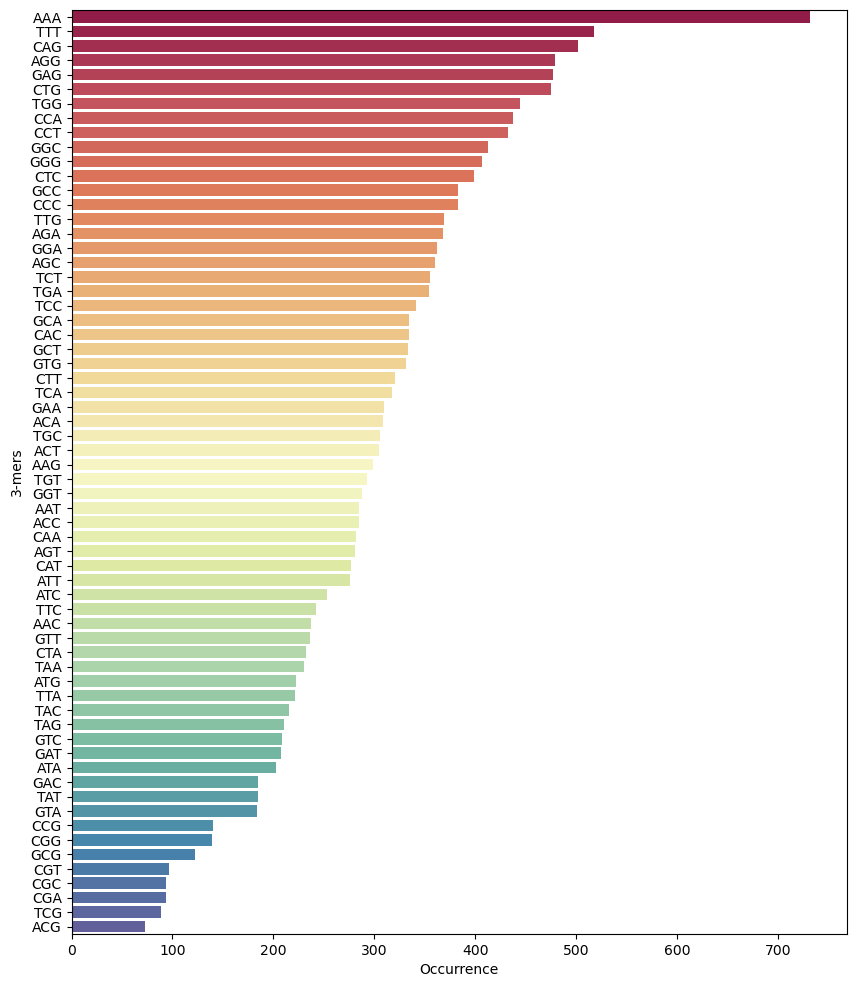

In [10]:
# Plot data for visualization

fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Occurrence", 
            y="3-mers", 
            ax=ax, 
            data=kmers3_df,
            palette = 'Spectral')
plt.show()


In [11]:
# Get the Coding and Template Strands using Biopython

Coding_Strand = print("Coding Strand: " + seq1)
Template_Strand = print("Template Strand: " + seq1.reverse_complement()) # The template strand is the reverse complement of the coding strand
type(seq1)

Coding Strand: CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAAACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGAAATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTTCCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTCGTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGCCCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTTTTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGGCCGGTTCCTCTTACTTGGCAGAGGGAGGCTGCTATTCTCCGCCTGCATTTCTTTTTCTGGATTACTTAGTTATGGCCTT

Bio.Seq.Seq

In [12]:
# Transcribe it into messenger RNA where Thymine (T) changes to Uracil (U) using Biopython

mRNA_seq1 = seq1.transcribe() # This transcribes the coding strand
mRNA_seq1

Seq('CUCAAAAGUCUAGAGCCACCGUCCAGGGAGCAGGUAGCUGCUGGGCUCCGGGGA...CCA')

In [13]:
# Translate into proteins using Biopython

protein_seq1 = mRNA_seq1.translate()
len(protein_seq1)

# Call each aa chains and set a new variable that changes the type from seq to string
aa_chains = protein_seq1.split("*") 
aa_chains_string = [str(i) for i in aa_chains] 

#Remove chains smaller than 20 amino acids long. After removing aa_chains with the length of less than 20, our aa_chains count went from 264 to 112.
for i in aa_chains_string[:]:
    if len(i) < 20:
        aa_chains_string.remove(i)
        
# Turn into a dataframe
aa_df = pd.DataFrame({"amino_acids":aa_chains_string})
aa_df['count'] = aa_df['amino_acids'].str.len()
aa_df.nlargest(15, "count")


/opt/homebrew/anaconda3/lib/python3.9/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,amino_acids,count
9,VLAPNRSVMPTKSQTLFIVPETFHHVSSQSIPDPTFILISITILPV...,126
88,CSHSSLQPPPPRLHPSSQLSLPSCFNYRPAPPCLANFYLFIFILFY...,122
79,VGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSRSGATCHPAH...,99
82,ASRTRSGGGDQGCSYASDSLLSPFLASFLALPNNTSSSPQPKKKPL...,92
66,NIGRENVKQPFFSCSTGSRAVSDTGMVLGEGVPSLQAQVTQGWKCL...,90
67,VDPLEGQAHHPHPNPSPLAETCGKRKFHGTDFLLLSFRLPENNVLV...,90
18,PLSAIFYLSPLFSALFKRWRKKQYPSYTNSSENRGTDWARWLIPVI...,89
14,LFESFTCYFGFLFVFIVQLWDCFIHSGYKSFIRSMCRECFLLICCL...,82
55,SQLLRKLRQEDRLNLGGGGYSESRSHHCTLAWVTGRDSVSKKKKKK...,81
101,PHSCLSVSTEHPNPGTSVDTSLPFSATPSPELEGLKEGPNNCVILN...,75
